# Wine Quality - Classification
 **Introduzione al Dataset**
Il dataset "Wine Quality" fornisce informazioni chimiche su vini rossi e bianchi,from the north of Portugal.
- Nome Dataset: Wine Quality (Red & White) [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality)
- Fonte: UCI Machine Learning Repository 
- Obiettivo: Analizzare i fattori chimico-fisici che influenzano la qualità del vino e sviluppare modelli di classificazione per predirne la qualità. 
- Tipologia: Dataset supervisionato per classificazione 
    
## 1. Caricamento e comprensione dei dati
 carichiamo il dataset nell'ambiente Python con librerie come 'pandas'.


In [ ]:
import pandas as pd

# Caricamento dei dati
df = pd.read_csv("winequality.csv") 

# Visualizzazione delle prime righe
print(df.head())

# Informazioni di base
print(df.info())

# Distribuzione delle etichette di qualità
print(df['quality'].value_counts())

**Struttura del Dataset:**

    • Numero di campioni: ~6.400 (vino bianco), ~1.600 (vino rosso) 
    • Numero di features: 12 (11 variabili indipendenti + 1 target) 
    • Variabile target: Qualità del vino (scala 0-10) 
    • Feature principali: 
        ◦ Acidità fissa e volatile 
        ◦ Residuo zuccherino 
        ◦ Densità 
        ◦ pH 
        ◦ Contenuto di alcol 
        ◦ Anidride solforosa 

## 2. Analisi esplorativa dei dati (EDA)
Effettuamo un'analisi descrittiva per visualizzare le relazioni tra le variabili.

**a) Statistiche descrittive**

In [ ]:
print(df.describe())


- Il valore medio di alcol è circa 11,3%

- Il pH medio è di circa 3,16, indicando una leggera acidità

- La densità media è 1.009 con una variabilità ridotta

- Il residuo zuccherino varia ampiamente con una media di 31,3 g/L, 

**b) Visualizzazioni chiave**
con l'utilizzo di librerie come matplotlib e seaborn per analizzare relazioni tra le feature e la qualità del vino.

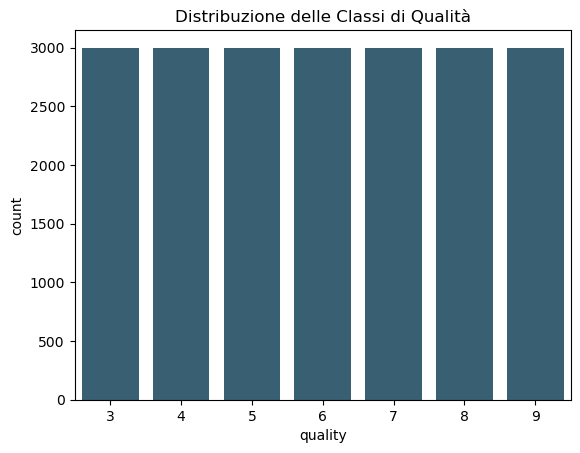

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribuzione della qualità
sns.countplot(x='quality', data=df, color='#2e627c')
plt.title("Distribuzione delle Classi di Qualità")
plt.show()




C:\Users\black\AppData\Local\Temp\ipykernel_6000\3621347881.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


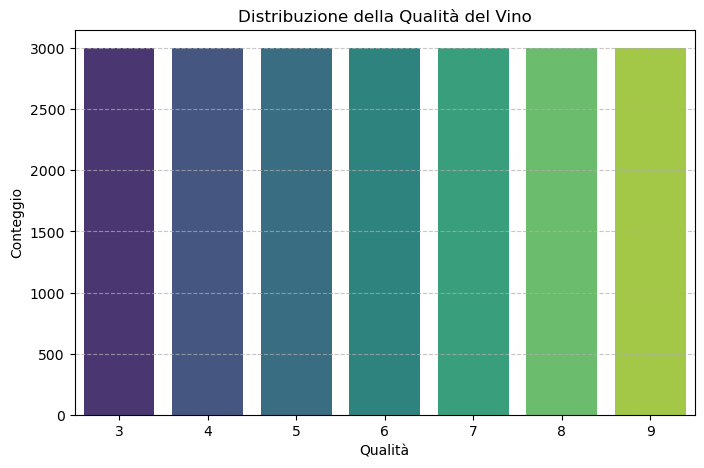

In [189]:
# Plot distribution of wine quality
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Distribuzione della Qualità del Vino')
plt.xlabel('Qualità')
plt.ylabel('Conteggio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

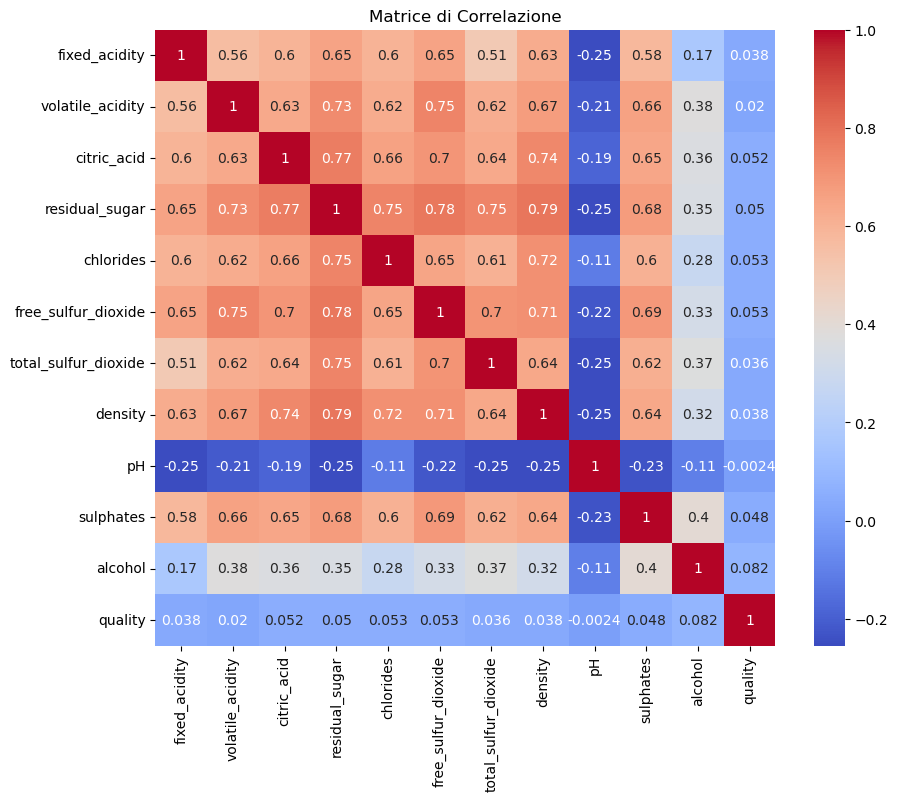

In [162]:
# Matrice di correlazione
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice di Correlazione")
plt.show()

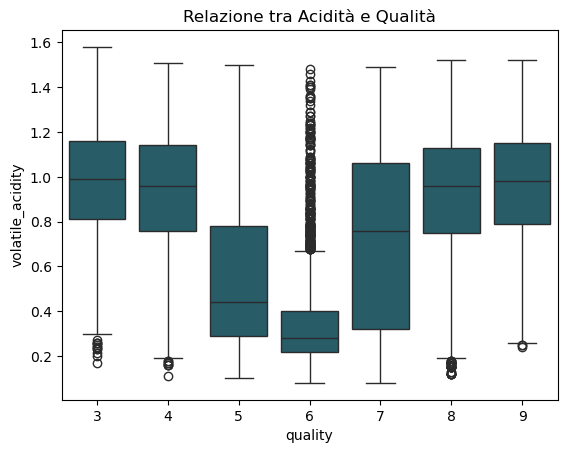

In [164]:
# Relazione tra acido e qualità
sns.boxplot(x='quality', y='volatile_acidity', data=df, color='#1d6371')
plt.title("Relazione tra Acidità e Qualità")
plt.show()

    • Distribuzione della qualità: 
        ◦ La maggior parte dei vini ha una qualità compresa tra 5 e 7 
        ◦ Dati sbilanciati con poche istanze per valori estremi (0, 1, 9) 
    • Correlazioni tra variabili: 
        ◦ L'alcol è positivamente correlato alla qualità 
        ◦ L'acidità volatile ha una correlazione negativa con la qualità 
    • Presenza di outlier: Identificati in parametri come la densità e l'acidità volatile 

## 3. Preprocessing dei dati
Pulizia e preparazione per il training di un modello.

**a) Gestione dei valori mancanti**

In [168]:
df.isnull().sum()  # Identifica valori nulli
df.dropna(inplace=True)  # Se necessario, rimuovi righe con valori mancanti


**b) Normalizzazione o standardizzazione**

In [171]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(columns=['quality'])), columns=df.columns[:-1])
df_scaled['quality'] = df['quality']


    • Pulizia dei dati: 
        ◦ Rimozione di valori nulli o inconsistenti 
        ◦ Gestione di eventuali outlier 
    • Normalizzazione/Standardizzazione: Applicata per uniformare le scale delle variabili 
    • Feature Engineering: 
        ◦ Creazione di nuove feature derivate 
        ◦ Discretizzazione di alcune variabili 

## 4. Costruzione di un modello di classificazione
Utilizzare modelli di machine learning per prevedere la qualità del vino.

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separazione tra feature e target
X = df.drop(columns=['quality'])
y = df['quality']

# Divisione del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Addestramento di un modello
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Valutazione
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6147619047619047
              precision    recall  f1-score   support

           3       0.52      0.68      0.59       566
           4       0.61      0.59      0.60       627
           5       0.73      0.57      0.64       621
           6       0.65      0.74      0.69       580
           7       0.72      0.47      0.57       625
           8       0.59      0.60      0.60       608
           9       0.56      0.67      0.61       573

    accuracy                           0.61      4200
   macro avg       0.63      0.62      0.61      4200
weighted avg       0.63      0.61      0.61      4200



Modelli da considerare:
- Random Forest: per feature importance e interpretabilità
- SVM: se il dataset è ben bilanciato
- XGBoost: per migliorare l'accuratezza su dataset più complessi.
  


**Insight principali:**
- L'alcol e l'acidità volatile sono le feature più determinanti per la qualità. 
- I modelli possono ottenere un'accuratezza superiore al 70% dopo il tuning. 
- Potenziale per clustering dei vini in base a caratteristiche chimiche. 

## 5. Interpretazione dei risultati e feature importance
Dopo il training del modello, analizziamo le feature più importanti.

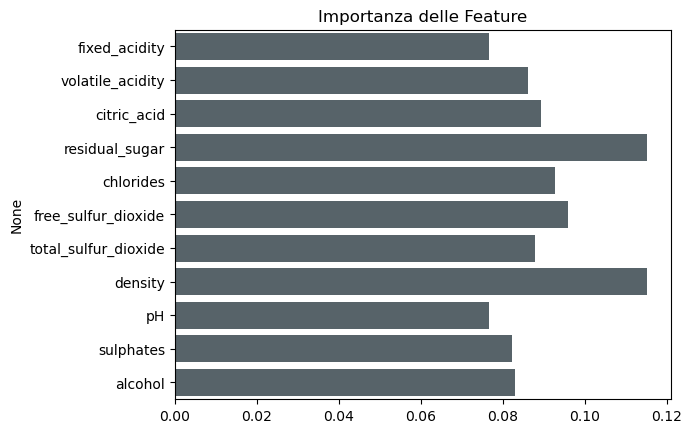

In [179]:
importances = model.feature_importances_
feature_names = X.columns

# Visualizzazione delle feature più importanti
sns.barplot(x=importances, y=feature_names, color='#54646c')
plt.title("Importanza delle Feature")
plt.show()


Cosa possiamo scoprire:

- Quali caratteristiche influenzano maggiormente la qualità del vino (es. lo zucchero residuale, la densita).
- oltre a possibili strategie per migliorare la qualità in base ai dati.

## 6. Ottimizzazione e tuning del modello
Utilizzare la ricerca di iperparametri per migliorare le prestazioni.

In [186]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)


{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


## 7. Conclusioni e insight finali

L'analisi del dataset Wine Quality consente di ottenere preziosi insight per il settore enologico, migliorando la comprensione dei fattori che influenzano la qualità del vino e fornendo strumenti per la classificazione automatica basata su AI.

 Alcuni insight potrebbero essere:

- L'alcol è la variabile più influente sulla qualità.
- Esistono soglie di acidità oltre le quali la qualità peggiora.
- Il modello può prevedere con buona precisione vini di qualità superiore.